### Import your librares

In [1]:
import pandas as pd
import numpy as np
import plotly as px
import seaborn as sns

### Load your dataset

In [2]:
data=pd.read_csv("seattle_weather.csv")
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


### Handle missing data in PRCP and RAIN columns

In [3]:
data.isnull().sum() # Show Null values

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [4]:
data[data["PRCP"].isnull()] # Show null values in data frame

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [5]:
data.query("TMAX==70 and TMIN ==52") #  Just to Show where Null Values Located to Know how to handle with missing value

,DATE,PRCP,TMAX,TMIN,RAIN
570,1949-07-24,0.05,70,52,True
1699,1952-08-26,0.00,70,52,False
2362,1954-06-20,0.06,70,52,True
2441,1954-09-07,0.14,70,52,True
2694,1955-05-18,0.00,70,52,False
4190,1959-06-22,0.00,70,52,False
4197,1959-06-29,0.00,70,52,False
5304,1962-07-10,0.00,70,52,False
5363,1962-09-07,0.00,70,52,False
6110,1964-09-23,0.00,70,52,False


In [6]:
## Varience before handla missing value
data.var()

C:\Users\ttsul\AppData\Local\Temp\ipykernel_17012\837425606.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


PRCP      0.057136
TMAX    163.149112
TMIN     79.082528
RAIN      0.244629
dtype: float64

In [7]:
data.RAIN.bfill(inplace=True)
data.PRCP.bfill(inplace=True)
data.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [8]:
## Varience After handla missing value
data.var()

C:\Users\ttsul\AppData\Local\Temp\ipykernel_17012\1260137731.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


PRCP      0.057131
TMAX    163.149112
TMIN     79.082528
RAIN      0.244622
dtype: float64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


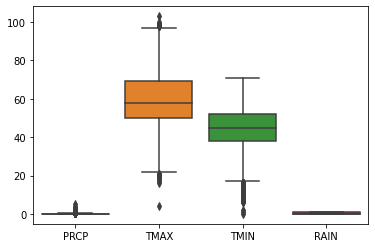

In [9]:
sns.boxplot(data=data); # Show Boxplot Outliers Before Remove Outliers

## Outliers Located in "PRCP" and "TMAX" and "TMIN" Columns

In [10]:
Q1P = np.percentile(data['PRCP'], 25, interpolation = 'midpoint')
Q3P = np.percentile(data['PRCP'], 75, interpolation = 'midpoint')
IQRP = Q3P - Q1P
               
print('PRCP : lower bound outliers ', Q1P - 1.5*(IQRP))
print('PRCP : higher bound outliers', Q3P + 1.5*(IQRP))

PRCP : lower bound outliers  -0.15000000000000002
PRCP : higher bound outliers 0.25


In [11]:
Q1X = np.percentile(data['TMAX'], 25, interpolation = 'midpoint')
Q3X = np.percentile(data['TMAX'], 75, interpolation = 'midpoint')
IQRX = Q3X - Q1X
print('TMAX : lower bound outliers ', Q1X - (1.5*(IQRX)))
print('TMAX : higher bound outliers', Q3X + (1.5*(IQRX)))

TMAX : lower bound outliers  21.5
TMAX : higher bound outliers 97.5


In [12]:
Q1N = np.percentile(data['TMIN'], 25, interpolation = 'midpoint')
Q3N = np.percentile(data['TMIN'], 75, interpolation = 'midpoint')
IQRN = Q3N - Q1N
               
print('TMIN : lower bound outliers ', Q1N - 1.5*(IQRN))
print('TMIN : higher bound outliers', Q3N + 1.5*(IQRN))

TMIN : lower bound outliers  17.0
TMIN : higher bound outliers 73.0


In [13]:
data = data.drop(data[(data['PRCP'] > 0.25) | (data['PRCP'] < -0.15000000000000002)].index)

In [14]:
data = data.drop(data[(data['TMAX'] > 97.5) | (data['TMAX'] < 21.5)].index)

In [15]:
data = data.drop(data[(data['TMIN'] > 73) | (data['TMIN'] < 17)].index)

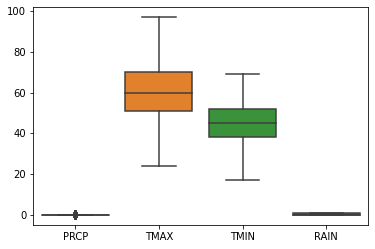

In [16]:
sns.boxplot(data=data); # Box plot after Remove Outliers